In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [48]:
energy_plant_data = pd.read_csv("D:\\Data Science Roadmap and Practice\\Machine Learning Projects\\Energy_Management_using_Machine_Learning\\notebook\Data\\energy_plant_data.csv")
energy_plant_data

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


In [49]:
energy_plant_data.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [50]:
energy_plant_data.tail()

,AT,V,AP,RH,PE
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341
9567,27.97,58.84,1002.25,57.88,457.630310


In [51]:
energy_plant_data.shape

(9568, 5)

In [52]:
energy_plant_data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [53]:
energy_plant_data = energy_plant_data.rename(columns = {
    'AT' : 'ambient_temp',
    'V' : 'exhaust_vacuum',
    'AP' : 'ambient_pressure',
    'RH' : 'relative_humidity',
    'PE' : 'electrical_energy'
})
energy_plant_data

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


In [54]:
energy_plant_data.head()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [55]:
energy_plant_data.duplicated().sum()

0

In [56]:
energy_plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_temp       9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   ambient_pressure   9568 non-null   float64
 3   relative_humidity  9568 non-null   float64
 4   electrical_energy  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [57]:
numerical_feature = [feature for feature in energy_plant_data.columns if energy_plant_data[feature].dtype !='O']
categorical_feature = [feature for feature in energy_plant_data.columns if energy_plant_data[feature].dtype =='O']


In [58]:
energy_plant_data[numerical_feature].head()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [59]:
energy_plant_data[numerical_feature].describe()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [60]:
energy_plant_data[numerical_feature].corr()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
ambient_temp,1.000000,0.842054,-0.514305,-0.541602,-0.946352
exhaust_vacuum,0.842054,1.000000,-0.415093,-0.306395,-0.867356
ambient_pressure,-0.514305,-0.415093,1.000000,0.115454,0.520058
relative_humidity,-0.541602,-0.306395,0.115454,1.000000,0.387785
electrical_energy,-0.946352,-0.867356,0.520058,0.387785,1.000000


<Figure size 800x600 with 0 Axes>

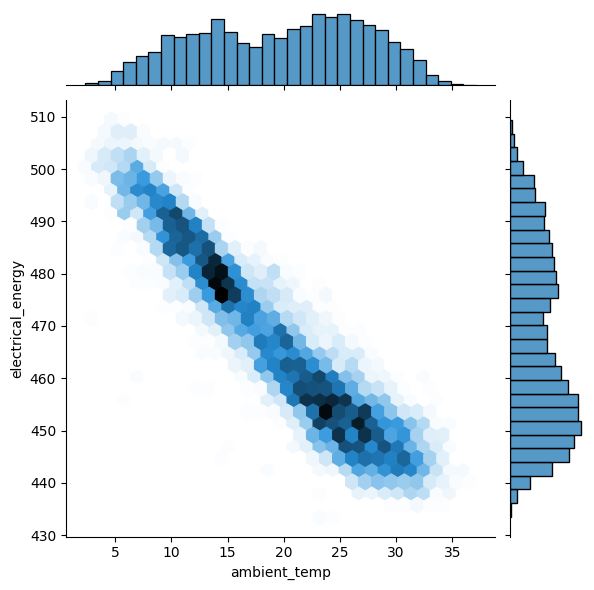

In [61]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'ambient_temp', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'hex')

<Figure size 800x600 with 0 Axes>

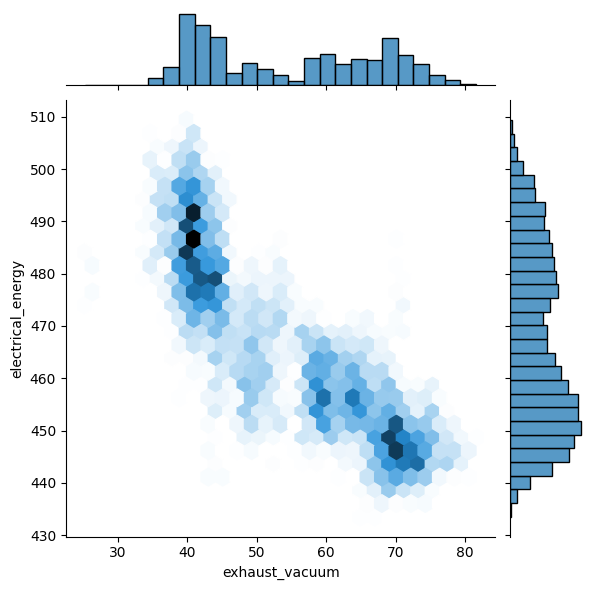

In [62]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'exhaust_vacuum', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'hex')

<Figure size 800x600 with 0 Axes>

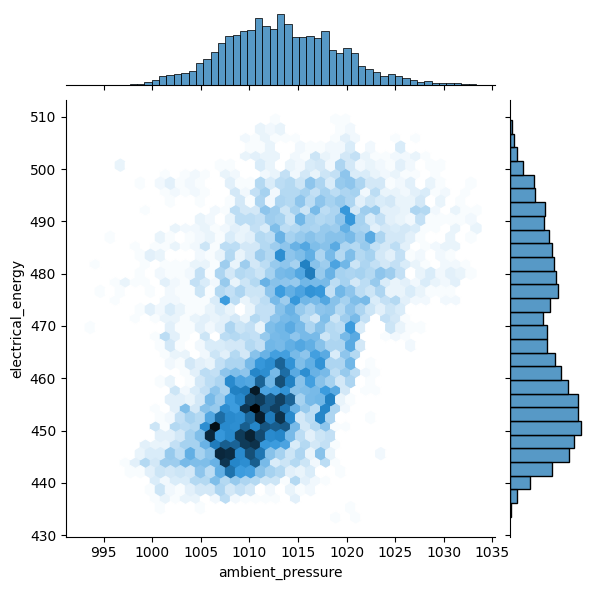

In [63]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'ambient_pressure', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'hex')

<Figure size 800x600 with 0 Axes>

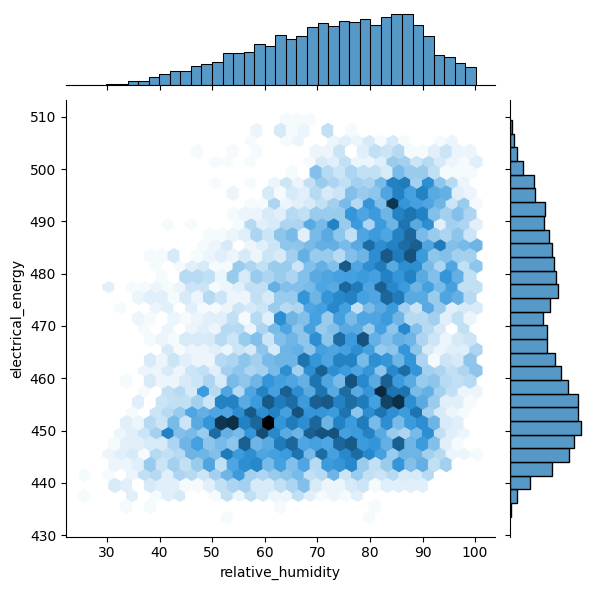

In [64]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'relative_humidity', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'hex')

<Figure size 800x600 with 0 Axes>

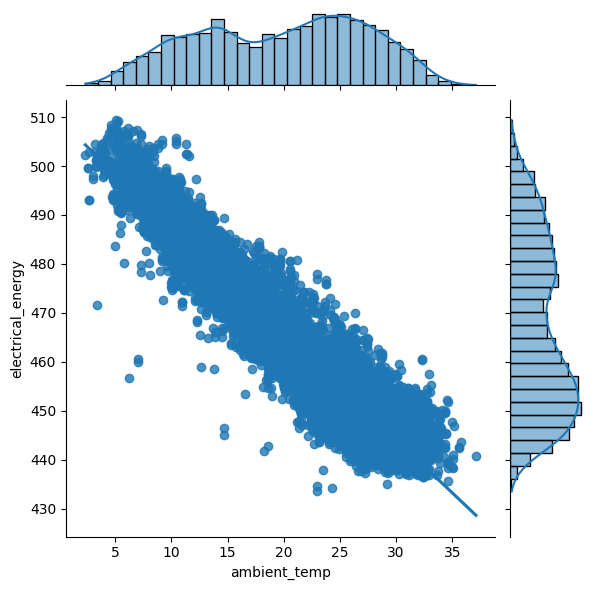

In [65]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'ambient_temp', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'reg')

<Figure size 800x600 with 0 Axes>

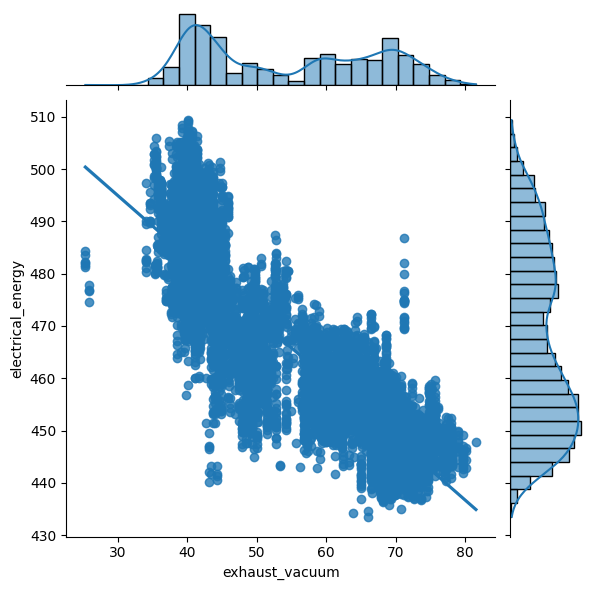

In [66]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'exhaust_vacuum', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'reg')

<Figure size 800x600 with 0 Axes>

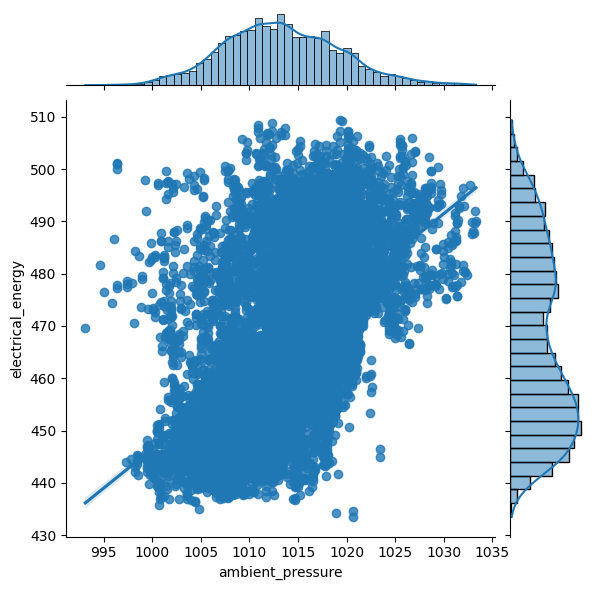

In [67]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'ambient_pressure', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'reg')

<Figure size 800x600 with 0 Axes>

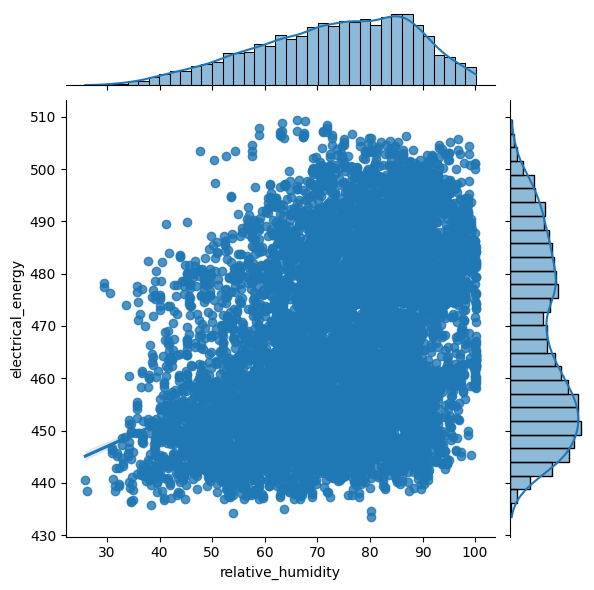

In [68]:
plt.figure(figsize = (8,6))
sns.jointplot(x = 'relative_humidity', y = 'electrical_energy', data = energy_plant_data[numerical_feature],kind = 'reg')

<Axes: xlabel='ambient_temp'>

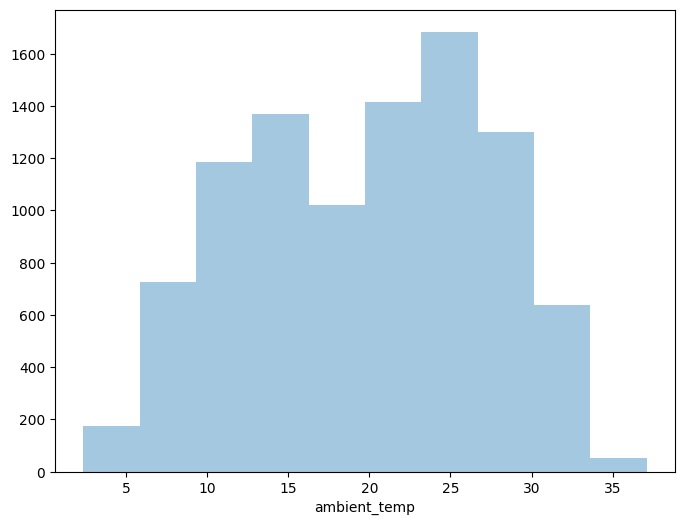

In [69]:
plt.figure(figsize = (8,6))
sns.distplot(energy_plant_data[numerical_feature]['ambient_temp'], kde = False, bins = 10)

<Axes: xlabel='exhaust_vacuum'>

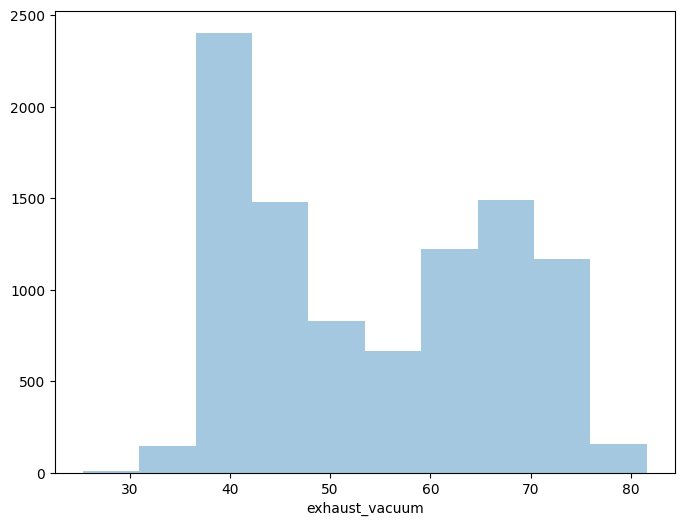

In [70]:
plt.figure(figsize = (8,6))
sns.distplot(energy_plant_data[numerical_feature]['exhaust_vacuum'], kde = False, bins = 10)

<Axes: xlabel='ambient_pressure'>

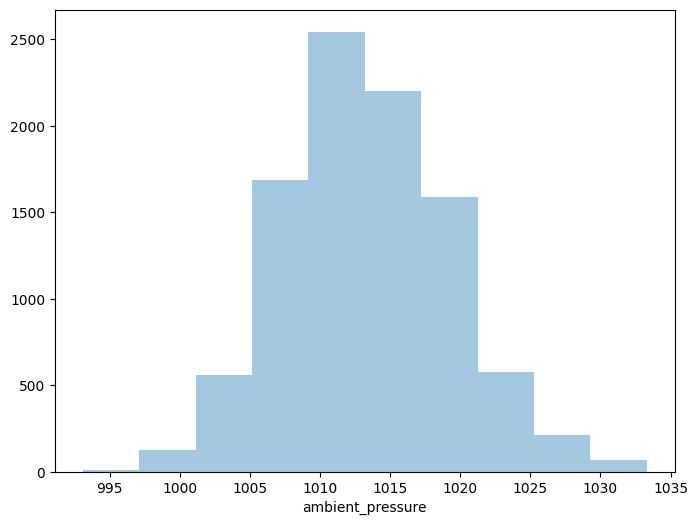

In [71]:
plt.figure(figsize = (8,6))
sns.distplot(energy_plant_data[numerical_feature]['ambient_pressure'], kde = False, bins = 10)

<Axes: xlabel='relative_humidity'>

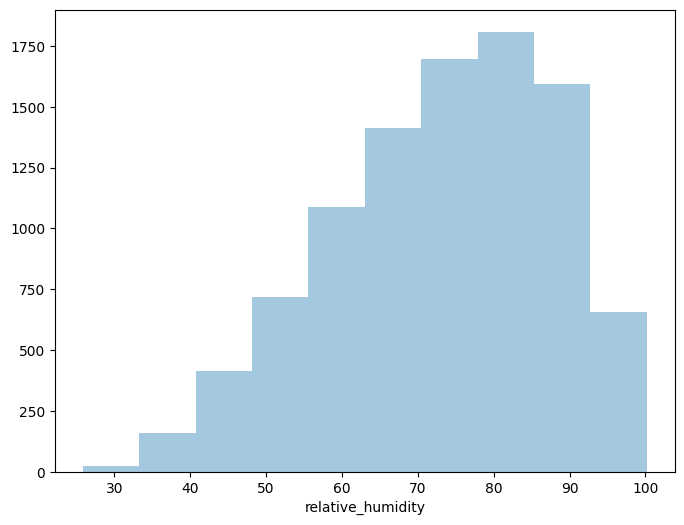

In [72]:
plt.figure(figsize = (8,6))
sns.distplot(energy_plant_data[numerical_feature]['relative_humidity'], kde = False, bins = 10)

<Axes: xlabel='electrical_energy'>

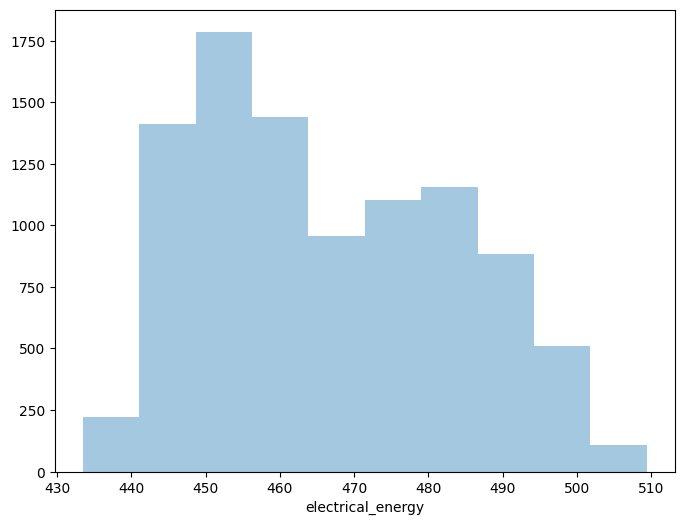

In [73]:
plt.figure(figsize = (8,6))
sns.distplot(energy_plant_data[numerical_feature]['electrical_energy'], kde = False, bins = 10)

In [74]:
energy_plant_data.describe()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [96]:
energy_plant_data['electrical_energy_zscore'] = ((energy_plant_data['electrical_energy'] - energy_plant_data['electrical_energy'].mean())/energy_plant_data['electrical_energy'].std())

In [97]:
energy_plant_data.head()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy,ambient_temp_zscore,exhaust_vacuum_zscore,ambient_pressure_zscore,relative_humidity_zscore,electrical_energy_zscore
0,29.07,72.51,1009.24,58.38,449.371855,1.261629,1.423397,-0.690632,-1.009405,-1.000641
1,32.38,67.17,1006.97,60.04,450.861043,1.708444,1.002261,-1.074981,-0.896017,-0.913164
2,19.29,67.71,1007.94,63.71,460.894029,-0.058566,1.044848,-0.910744,-0.645332,-0.323813
3,16.45,41.48,1016.64,45.21,467.577314,-0.441936,-1.023769,0.562314,-1.909000,0.068772
4,21.43,46.97,1013.94,61.25,469.805723,0.230311,-0.590803,0.105158,-0.813366,0.199672


In [98]:
energy_plant_data.describe()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy,ambient_temp_zscore,exhaust_vacuum_zscore,ambient_pressure_zscore,relative_humidity_zscore,electrical_energy_zscore
count,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03
mean,19.754263,54.506382,1013.259955,73.167497,466.406548,0.004105,0.003551,-0.009985,0.000675,1.719879e-15
std,7.397054,12.676262,5.805276,14.625578,17.023781,0.998523,0.999707,0.982932,0.999020,1.000000e+00
min,2.340000,25.360000,995.880000,29.430000,433.506276,-2.346635,-2.295065,-2.952707,-2.986874,-1.932607e+00
25%,13.585000,41.780000,1009.200000,62.972500,451.861996,-0.828680,-1.000109,-0.697404,-0.695708,-8.543667e-01
50%,20.570000,52.840000,1013.020000,74.865000,463.306871,0.114220,-0.127868,-0.050613,0.116625,-1.820792e-01
75%,25.790000,66.560000,1017.280000,84.830000,480.477439,0.818864,0.954153,0.670677,0.797298,8.265433e-01
max,37.110000,81.560000,1031.010000,100.160000,509.381540,2.346943,2.137121,2.995399,1.844434,2.524409e+00


In [99]:
energy_plant_data = energy_plant_data.loc[(energy_plant_data['electrical_energy_zscore'] >= -3) & (energy_plant_data['electrical_energy_zscore'] <= 3)]

In [100]:
energy_plant_data.describe()

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy,ambient_temp_zscore,exhaust_vacuum_zscore,ambient_pressure_zscore,relative_humidity_zscore,electrical_energy_zscore
count,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03
mean,19.754263,54.506382,1013.259955,73.167497,466.406548,0.004105,0.003551,-0.009985,0.000675,1.719879e-15
std,7.397054,12.676262,5.805276,14.625578,17.023781,0.998523,0.999707,0.982932,0.999020,1.000000e+00
min,2.340000,25.360000,995.880000,29.430000,433.506276,-2.346635,-2.295065,-2.952707,-2.986874,-1.932607e+00
25%,13.585000,41.780000,1009.200000,62.972500,451.861996,-0.828680,-1.000109,-0.697404,-0.695708,-8.543667e-01
50%,20.570000,52.840000,1013.020000,74.865000,463.306871,0.114220,-0.127868,-0.050613,0.116625,-1.820792e-01
75%,25.790000,66.560000,1017.280000,84.830000,480.477439,0.818864,0.954153,0.670677,0.797298,8.265433e-01
max,37.110000,81.560000,1031.010000,100.160000,509.381540,2.346943,2.137121,2.995399,1.844434,2.524409e+00


In [102]:
energy_plant_data.shape

(9530, 10)

In [103]:
columns = ['ambient_temp_zscore','exhaust_vacuum_zscore','ambient_pressure_zscore','relative_humidity_zscore','electrical_energy_zscore']
energy_plant_data = energy_plant_data.drop(columns,axis = 1)
energy_plant_data

,ambient_temp,exhaust_vacuum,ambient_pressure,relative_humidity,electrical_energy
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


In [104]:
energy_plant_data.to_csv("energy_plant_data_updated.csv",index = False)